In [64]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [65]:
csv_path = './2_energycost/energy.csv'
# workload_list = ['mix1', 'mix2', 'mix3', 'mix4']
workload_list = ['gcc', 'bwaves', 'mcf', 'cactu', 'lbm', 'omnetpp', 'cam4', 'fotonik3d', 'roms', 'xz', 'cc.twitter', 'cc.web', 'pr.twitter', 'pr.web', 'resnet50', 'resnext50', 'YCSB-A', 'YCSB-B', 'Geomean']
energy_scheme_list = ['Footprint Cache', 'Baryon']
workload_dict = {item: item for item in workload_list}
energy_scheme_dict = {item: item for item in energy_scheme_list}

energy_title = 'Normalized Energy'
energy_name = 'graph_energy'
energy_ylim = (0, 1.5)
energy_yticks = list(np.arange(energy_ylim[0], energy_ylim[1]+0.01, 0.2))

new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]


fpcache_color = '#c4cfe4'
yacc_color = new_color[2]
baryon_color = new_color[6]
hybrid2_color = new_color[3]
energy_bar_colors = [fpcache_color, baryon_color]
assert len(energy_bar_colors) == len(energy_scheme_dict)

# pprint(energy_yticks)

In [66]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [67]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
energy_xlabels = []
energy_xticks = []
energy_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in energy_scheme_dict):
                row_value.append(row[col])
        energy_data_2darr.append(row_value)
        if workload_fullname.startswith('5'):
            abbr_name = workload_fullname[0:3]
        else:
            abbr_name = workload_fullname
        energy_xlabels.append(abbr_name)
        xtick += 1
        energy_xticks.append(xtick)
assert len(energy_data_2darr) == len(energy_xlabels) == len(energy_xticks)

pprint(energy_data_2darr)

[[1.0, 0.56],
 [1.0, 0.57],
 [1.0, 0.66],
 [1.0, 0.62],
 [1.0, 0.66],
 [1.0, 1.06],
 [1.0, 1.14],
 [1.0, 0.53],
 [1.0, 0.75],
 [1.0, 1.26],
 [1.0, 0.57],
 [1.0, 0.39],
 [1.0, 0.7],
 [1.0, 0.4],
 [1.0, 0.92],
 [1.0, 1.01],
 [1.0, 0.88],
 [1.0, 0.88],
 [1.0, 0.72]]


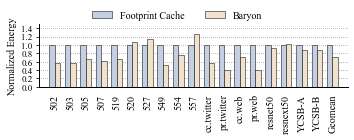

In [68]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(energy_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

h = easypyplot.barchart.draw(
    ax, energy_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=energy_xlabels,
    xticks=energy_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    prop=ft,
    colors=energy_bar_colors)

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(energy_xticks)
ax.set_xticklabels(energy_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(energy_ylim)
ax.set_yticks(energy_yticks)
ax.set_ylabel(energy_title, multialignment='center', fontproperties=ft)

''' values on top of each bar '''
# for group_id in range(len(workload_dict)):
#     for entry_id in range(len(scheme_dict)):
#         bar_value = fig_data_2darr[group_id][entry_id]
#         bar_x = ax.get_xticks()[group_id] + fig_bar_width / len(scheme_dict) * (entry_id - len(scheme_dict) / 2)
#         bar_text = str('{:.2f}'.format(bar_value))
#         ax.text(bar_x, bar_value + 0.1, bar_text, ha='left', va='top',
#                 fontsize=fig_label_fontsize,
#                 # rotation=90,
#                 fontproperties=ft,
#                 )

''' legend '''
legend = [energy_scheme_dict[item] for item in energy_scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.09),
        ncol=4, frameon=False, prop=ft)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [69]:
''' Save figures'''
fig.savefig(energy_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures